Analysis of the results computed in 'Learning rate gridsearch and training' and 'Adaptive gradient methods traning speed experiment' notebooks.  

Displays layer rotation curves and test accuracies for adaptive gradients with and without Layca to control layer rotation rates.

Displays training curves for adaptive gradients methods, SGD+weight decay and SGD+Layca (with layer rotation rates copied from adaptive gradient method training)

In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from layer_rotation_utils import plot_layer_rotation_curves

Using TensorFlow backend.


In [3]:
with open('results_lr_gridsearch.p','rb') as f:
    results = pickle.load(f)

In [4]:
# test accuracies obtained with Layca's best configuration
ref_performances = {'C10-CNN1':0.8845,'C100-resnet':0.5981,'tiny-CNN':0.5089,'C10-CNN2':0.934,'C100-WRN':0.8069}

# specifies the adaptive gradient method that was used for each task
adaptive_optimizers = {'C10-CNN1':'RMSprop','C100-resnet':'Adam','tiny-CNN':'Adagrad','C10-CNN2':'RMSprop_weight_decay','C100-WRN':'Adam_weight_decay'}

In [5]:
mpld3.disable_notebook()

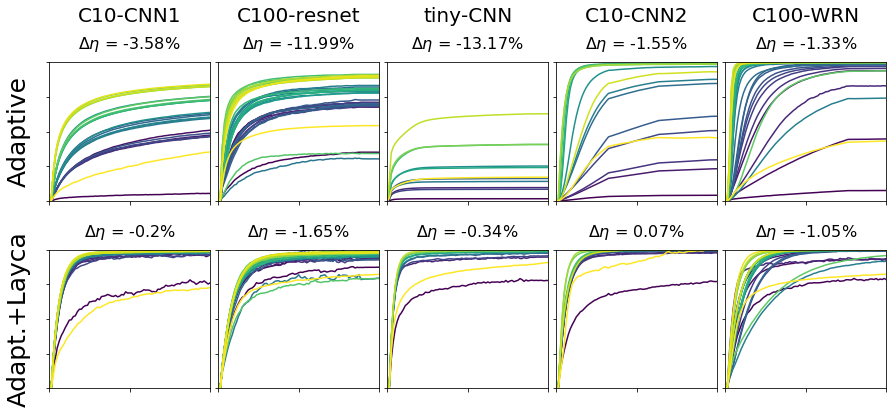

In [11]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
f, axes = plt.subplots(2,len(tasks), figsize = (3*len(tasks),6))
for i,task in enumerate(tasks):
    adaptive_layca = adaptive_optimizers[task].replace('_weight_decay','') + '_layca'
    
    plot_layer_rotation_curves(results[task][adaptive_optimizers[task]]['ladc'], ax = axes[0,i])
    plot_layer_rotation_curves(results[task][adaptive_layca]['ladc'], ax = axes[1,i])
    
    ref_performance = ref_performances[task]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task][adaptive_optimizers[task]]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    axes[1,i].set_title('$\Delta \eta$ = '+str(round((results[task][adaptive_layca]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlabel('')
    axes[0,i].set_ylabel('')
    axes[0,i].set_xticklabels('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80]) 
    axes[1,i].set_xlim([0,80])
    axes[1,i].set_xticks([0,40,80])
    
    axes[1,i].set_ylabel('')
    axes[1,i].set_yticklabels('')
    axes[1,i].set_xlabel('')
    axes[1,i].set_xticklabels('')
        
axes[1,0].set_xticks([0,40,80]) 

pad = 3
axes[0,0].annotate('Adaptive', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
            xycoords=axes[0,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)
pad = 3
axes[1,0].annotate('Adapt.+Layca', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
            xycoords=axes[1,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)

for j in range(5):
    pad = 40
    size = 20
    axes[0,j].annotate(tasks[j], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    
    
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/adaptive_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")

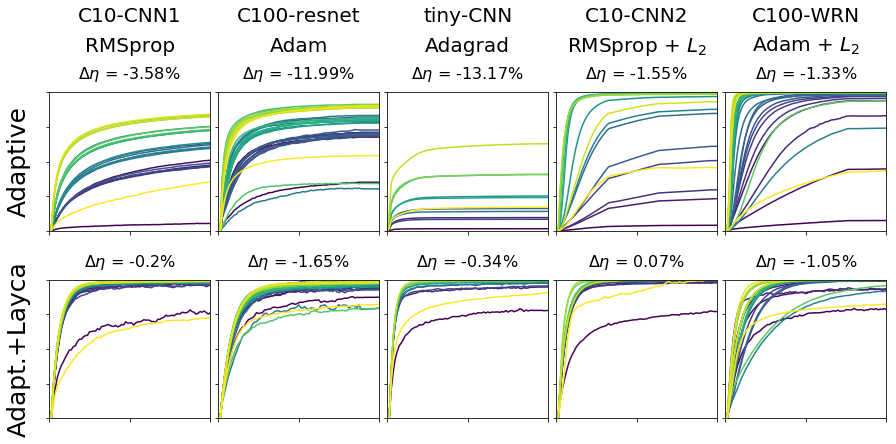

In [10]:
# same figure with adaptive methods specified (for ICML poster)

matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']

adaptive_optimizers_names = {'C10-CNN1':'RMSprop','C100-resnet':'Adam','tiny-CNN':'Adagrad',
                             'C10-CNN2':'RMSprop + $L_2$','C100-WRN':'Adam + $L_2$'}

f, axes = plt.subplots(2,len(tasks), figsize = (3*len(tasks),6))
for i,task in enumerate(tasks):
    adaptive_layca = adaptive_optimizers[task].replace('_weight_decay','') + '_layca'
    
    plot_layer_rotation_curves(results[task][adaptive_optimizers[task]]['ladc'], ax = axes[0,i])
    plot_layer_rotation_curves(results[task][adaptive_layca]['ladc'], ax = axes[1,i])
    
    ref_performance = ref_performances[task]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task][adaptive_optimizers[task]]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    axes[1,i].set_title('$\Delta \eta$ = '+str(round((results[task][adaptive_layca]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlabel('')
    axes[0,i].set_ylabel('')
    axes[0,i].set_xticklabels('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80]) 
    axes[1,i].set_xlim([0,80])
    axes[1,i].set_xticks([0,40,80])
    
    axes[1,i].set_ylabel('')
    axes[1,i].set_yticklabels('')
    axes[1,i].set_xlabel('')
    axes[1,i].set_xticklabels('')
        
axes[1,0].set_xticks([0,40,80]) 

pad = 3
axes[0,0].annotate('Adaptive', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
            xycoords=axes[0,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)
pad = 3
axes[1,0].annotate('Adapt.+Layca', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
            xycoords=axes[1,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)

for j in range(5):
    pad = 70
    size = 20
    axes[0,j].annotate(tasks[j], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    pad = 40
    size = 20
    axes[0,j].annotate(adaptive_optimizers_names[tasks[j]], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    
    
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/adaptive_analysis_curves_poster.png',format='png', dpi=200, bbox_inches="tight")

In [12]:
# Training accuracies for each layer rotation curves visualization abov

tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
performances = np.zeros((2,len(tasks)))
for i,task in enumerate(tasks):
    adaptive_layca = adaptive_optimizers[task].replace('_weight_decay','') + '_layca'
    
    performances[0,i] = round(results[task][adaptive_optimizers[task]]['history']['history']['acc'][-1],3)
    performances[1,i] = round(results[task][adaptive_layca]['history']['history']['acc'][-1],3)
print(performances)

[[1.    1.    1.    1.    0.999]
 [1.    0.997 0.992 1.    1.   ]]


In [6]:
with open('results_explanatory_adaptive.p','rb') as f:
    results_speed = pickle.load(f)

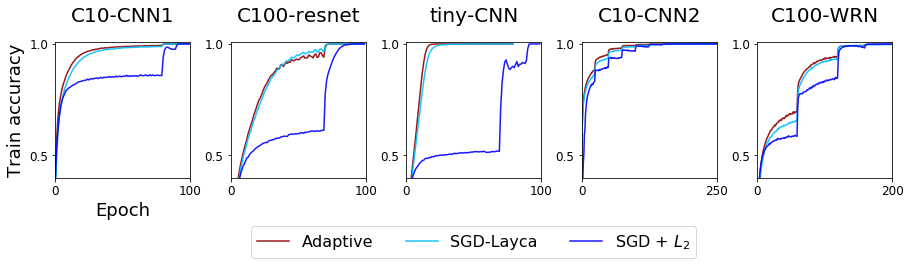

In [8]:
matplotlib.rcParams.update({'font.size': 12})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']

colors = ['darkred','deepskyblue','blue']
labels = ['Adaptive','SGD-Layca', 'SGD + $L_2$']
# colors = {'SGD_layca':'deepskyblue','RMSprop_layca':'darkviolet','Adagrad_layca':'blue', 'SGD_AMom_layca':'darkred','Adam_layca':'red'}

f, axes = plt.subplots(1,len(tasks), figsize = (3*len(tasks),2.5),sharex = 'col') #,sharey=True
for i,task in enumerate(tasks):
    if task == 'C10-CNN1':
        optimizers = ['RMSprop','SGD_layca', 'SGD_weight_decay']
    elif task == 'C100-resnet':
        optimizers = ['Adam','SGD_AMom_layca', 'SGD_weight_decay']
    elif task == 'tiny-CNN':
        optimizers = ['Adagrad','SGD_layca', 'SGD_weight_decay']
    elif task == 'C10-CNN2':
        optimizers = ['RMSprop_weight_decay','SGD_layca', 'SGD_weight_decay']
    elif task == 'C100-WRN':
        optimizers = ['Adam_weight_decay','SGD_AMom_layca', 'SGD_weight_decay']

    min_acc = 1.
    for j,optimizer in enumerate(optimizers):
        if optimizer == 'SGD_weight_decay' and task in ['C10-CNN1', 'C100-resnet', 'tiny-CNN']:
            data = results[task][optimizer]['history']
        else:
            data = results_speed[task][optimizer]['history']
        
        axes[i].plot(data['epoch'],data['history']['acc'],'-', color = colors[j], label = labels[j],alpha = 0.9)
        min_acc = min(round(data['history']['acc'][10],2),min_acc)


    axes[i].set_yticks([0.5,1.])
    axes[i].set_ylim([0.4,1.01])

    axes[i].set_xticks([0.,round(data['epoch'][-1],-1)])
    axes[i].set_xlim([0.,round(data['epoch'][-1],-1)])
        
    pad = 20
    size = 20
    axes[i].annotate(task, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')


axes[0].set_ylabel('Train accuracy',size = 18)
# axes[1,0].set_ylabel('Test accuracy',size = 18)
axes[0].set_xlabel('Epoch',size = 18)
plt.subplots_adjust(hspace=0.1,wspace=0.3)

axes[-3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, ncol=5,fontsize = 16)

plt.savefig('figures/adaptive_analysis_histories.png',format='png', dpi=200, bbox_inches="tight")